# multivariate cointegration

In [ ]:
# load any necessary packages
library(tseries)
library(urca)
library(vars)
# Load and preprocess the data
CL1 <- read.csv('CL1.csv')
CL2 <- read.csv('CL2.csv')
CL3 <- read.csv('CL3.csv')

data <- merge(merge(CL1, CL2, how = 'inner', by = 'Date', sort=FALSE), CL3, how = 'inner', by = 'Date', sort=FALSE)
d <- data[2:4]

In [2]:
# visualize(I)
head(d)

CL1.Comdty CL2.Comdty CL3.Comdty
1 106.70     107.17     107.64    
2 106.72     107.18     107.63    
3 104.70     105.21     105.75    
4 106.16     106.65     107.18    
5 106.58     107.06     107.56    
6 107.40     107.87     108.33

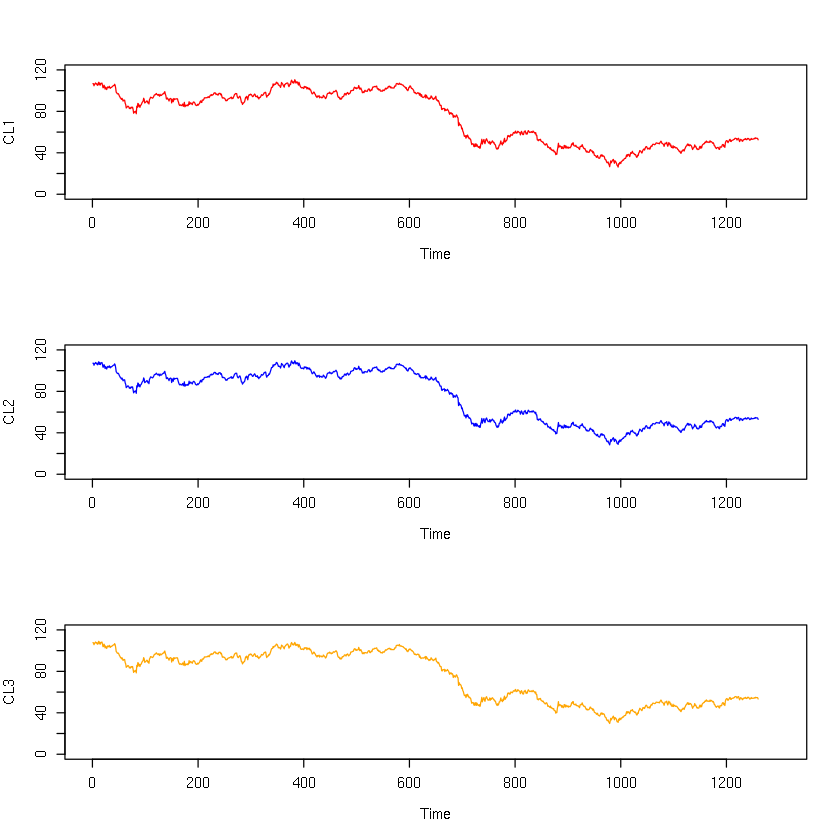

In [3]:
# visualize(II)
colors=c("red","blue","orange")
par(mfrow=c(3,1)) 
plot(1:length(d[,1]),d[,1],type="l",col=colors[1],xlab="Time",ylab="CL1",xlim=c(0,1300),ylim=c(0,120))
plot(1:length(d[,2]),d[,2],type="l",col=colors[2],xlab="Time",ylab="CL2",xlim=c(0,1300),ylim=c(0,120))
plot(1:length(d[,3]),d[,3],type="l",col=colors[3],xlab="Time",ylab="CL3",xlim=c(0,1300),ylim=c(0,120))

In [4]:
# From ADF, we know that they are I(1) time series
if (adf.test(d[,1])$p.value > 0.05 && adf.test(diff(d[,1]))$p.value < 0.05)
    cat ("CL1 is I(1)")
if (adf.test(d[,2])$p.value > 0.05 && adf.test(diff(d[,2]))$p.value < 0.05)
    cat ("CL2 is I(1)")
if (adf.test(d[,3])$p.value > 0.05 && adf.test(diff(d[,3]))$p.value < 0.05)
    cat ("CL3 is I(1)")

Warning message in adf.test(diff(d[, 1])):
“p-value smaller than printed p-value”

CL1 is I(1)

Warning message in adf.test(diff(d[, 2])):
“p-value smaller than printed p-value”

CL2 is I(1)

Warning message in adf.test(diff(d[, 3])):
“p-value smaller than printed p-value”

CL3 is I(1)

In [5]:
# calculate the lag, we use 7 as the lag
VARselect(d)

$selection
AIC(n)  HQ(n)  SC(n) FPE(n) 
     7      2      2      7 

$criteria
                   1             2             3             4             5
AIC(n) -8.6382234376 -8.6976205241 -8.6992490668 -8.6990999138 -8.6960163125
HQ(n)  -8.6197062417 -8.6652154312 -8.6529560769 -8.6389190269 -8.6219475286
SC(n)  -8.5889668089 -8.6114214238 -8.5761074949 -8.5390158703 -8.4989897974
FPE(n)  0.0001772014  0.0001669827  0.0001667111  0.0001667362  0.0001672515
                   6            7             8             9            10
AIC(n) -8.7029373352 -8.707983195 -8.7049704676 -8.7043213155 -8.6978940891
HQ(n)  -8.6149806544 -8.606138617 -8.5892379929 -8.5747009438 -8.5543858204
SC(n)  -8.4689683486 -8.437071737 -8.3971165378 -8.3595249141 -8.3161552161
FPE(n)  0.0001660984  0.000165263  0.0001657625  0.0001658712  0.0001669421

In [6]:
# Johansen-Procedure
jotest=ca.jo(data.frame(d), type="trace", K=7, ecdet="none", spec="longrun")
summary(jotest)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.027955783 0.009167288 0.001404094

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  1.76  6.50  8.18 11.65
r <= 1 | 13.30 15.66 17.95 23.52
r = 0  | 48.83 28.71 31.52 37.22

Eigenvectors, normalised to first column:
(These are the cointegration relations)

              CL1.Comdty.l7 CL2.Comdty.l7 CL3.Comdty.l7
CL1.Comdty.l7     1.0000000       1.00000     1.0000000
CL2.Comdty.l7    -1.8581130     -26.53851    -1.5975899
CL3.Comdty.l7     0.8556115      26.07948     0.7672858

Weights W:
(This is the loading matrix)

             CL1.Comdty.l7 CL2.Comdty.l7 CL3.Comdty.l7
CL1.Comdty.d    -0.2721365  0.0016155050   -0.01024643
CL2.Comdty.d    -0.1686680  0.0014719817   -0.01042902
CL3.Comdty.d    -0.1409623  0.0008585245   -0.01033982


## Analysis

We use trace test statistic for the three hypotheses of $r \leq 2$, $r \leq 1$ and $r = 0$.
For the first test, $48.83 > 37.22$ which means we have strong evidence to reject the null hypothesis. For the second and the third test, we know that they do not reject the null hypothesis thus we conclude that $r = 1$ which means that there exist cointergration relationships.

To form a linear combination, we use the eigenvector of the largest egenvalue: $(1.0000000, -1.8581130,0.8556115)$ in this case. 

In [7]:
dd <- 1 * d[,1] - 1.8581130 * d[,2] + 0.8556115 * d[,3]
if (adf.test(dd)$p.value < 0.05)
    cat ("the combination is stationery which confirms the cointergration relationship again.")

the combination is stationery which confirms the cointergration relationship again.